# 最小二乘法

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

现在，生成一组数据，它们呈现线性关系，但参入了随机误差。

In [15]:
x = np.linspace(0, 100, num=1000)
e = np.random.uniform(-10, 10, 1000)
y = (2 * x + 1) + e

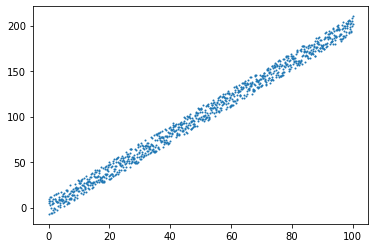

In [16]:
plt.scatter(x, y, s=1)

我们的任务就是利用最小二乘法，做一条对此数据的拟合直线。

leastsq 函数可以帮助我们完成此任务。它一般接受三个参数（另外的参数需要一定的数学知识才能理解其作用）：

1. 误差函数，用来计算数据与模型函数之间的误差
2. 模型初始值，
3. 传入数据

对于上面的数据，我们的期望是一个线性函数，因此，可以定义模型函数为：

In [17]:
def line(p: tuple, x: float) -> float:
    return p[0] * x + p[1]

p 是该函数的多项式系数数组。

误差函数可以定义为:

In [18]:
def error(p: tuple, x: float, y: float) -> float:
    y_hat = line(p, x)
    return y_hat - y

其作用就是计算出 “根据 p 参数和传入的统计数据 x 的值，得到的函数值预期 y_hat 与真实数据 y 的误差”。

然后，将误差函数、初始值、实际数据传递给 leastsq 函数。

初始值会影响此次拟合是否收敛以及收敛的速度，在大多数情况下都能成功收敛，
而收敛失败的情况以及解决方案需要学习此函数背后的数学实现才有能力处理。

请参考 “数值计算” 相关教材以及 scipy 官方文档的解释。

数据需要通过命名参数 `args` 进行传递。

In [19]:
result = leastsq(error, [1, 1], args=(x, y))

result 是一个二元组，第一个元素是我们所需要的 p 系数数组，第二个则是协方差。

In [21]:
p, c = result

作图检验一下：

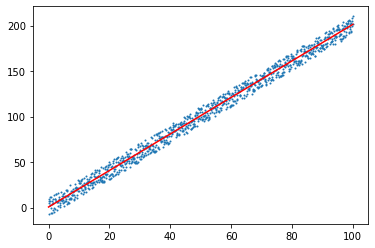

In [25]:
plt.scatter(x, y, s=1)
plt.plot(x, line(p, x), color="r")

拟合情况是很不错的。

leastsq 函数除了线性关系模型之外，也可以驾驭更高阶的多项式函数。
只要你能提供合适的模型函数。

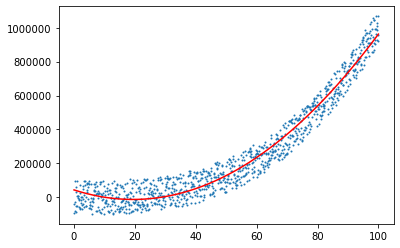

In [35]:
x = np.linspace(0, 100, num=1000)
y = x**3 + x**2 + x + np.random.uniform(-1e5, 1e5, 1000)
p, c = leastsq(lambda p, x, y: p[0]*x**2 + p[1]*x + p[2] - y, [1, 1, 1], args=(x, y))
plt.scatter(x, y, s=1)
plt.plot(x, p[0]*x**2 + p[1]*x + p[2], color="r")